In [2]:
# Importar librerías necesarias
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [3]:

# Cargar el dataset principal de solicitudes de adelanto en efectivo
cr = pd.read_csv('../project_dataset/extract - cash request - data analyst.csv')
# Inspeccionar la estructura y el tipo de datos de 'cash_request'
#cr.info()
# Crear una copia del DataFrame para preservar el original
credit_requests = cr.copy()

In [4]:
# Cargar el dataset de tarifas o fees para análisis de cohortes de tarifas
fs = pd.read_csv('../project_dataset/extract - fees - data analyst - .csv')
#fs.head()
# Crear una copia del DataFrame para preservar el original
fees = fs.copy()

In [6]:
# Clean `credit_requests`
# Rellenar valores nulos en 'user_id' usando 'deleted_account_id' (clientes transferidos de cuentas eliminadas)
cash_request = credit_requests
#cash_request.fillna({"user_id": cash_request["deleted_account_id"]}, inplace=True)

# 2. Estandarización de formatos
# Convert datetime columns to pandas datetime
datetime_columns = ['created_at', 'updated_at', 'moderated_at', 'reimbursement_date', 'money_back_date', 'send_at', 'reco_creation', 'reco_last_update']
for col in datetime_columns:
    cash_request[col] = pd.to_datetime(cash_request[col], errors='coerce')
    cash_request[col] = cash_request[col].dt.tz_localize(None)
    credit_requests[col] = pd.to_datetime(cash_request[col], errors='coerce')
    credit_requests[col] = credit_requests[col].dt.tz_localize(None)

#credit_requests['created_at'] = pd.to_datetime(credit_requests['created_at'])
#credit_requests['updated_at'] = pd.to_datetime(credit_requests['updated_at'])
#credit_requests['reimbursement_date'] = pd.to_datetime(credit_requests['reimbursement_date'])

# Fill missing `user_id` with -1 (or another placeholder)
credit_requests['user_id'] = credit_requests['user_id'].fillna(-1)

# 1. Manejo de valores faltantes
# - For simplicity: drop rows where `cash_request_id` is NaN (primary key related)
# - Impute 'category' with 'Unknown', keep `paid_at`, `from_date`, `to_date` for further filtering
data_cleaned = fs.dropna(subset=['cash_request_id'])
data_cleaned['category'] = data_cleaned['category'].fillna('Unknown')

# 2. Estandarización de formatos
# Convert datetime columns to pandas datetime
datetime_columns = ['created_at', 'updated_at', 'paid_at', 'from_date', 'to_date']
for col in datetime_columns:
    data_cleaned[col] = pd.to_datetime(data_cleaned[col], errors='coerce')
    data_cleaned[col] = data_cleaned[col].dt.tz_localize(None)

# Standardize column names
data_cleaned.columns = data_cleaned.columns.str.lower().str.replace(' ', '_')

# 3. Filtrado de datos irrelevantes
# Remove rows with invalid or irrelevant `status`
valid_statuses = ['accepted', 'rejected', 'pending']
data_cleaned = data_cleaned[data_cleaned['status'].isin(valid_statuses)]


In [7]:
# Duplicate rows
print(f"Duplicate rows in credit_requests: {credit_requests.duplicated().sum()}")
print(f"Duplicate rows in fees: {fees.duplicated().sum()}")


Duplicate rows in credit_requests: 0
Duplicate rows in fees: 0


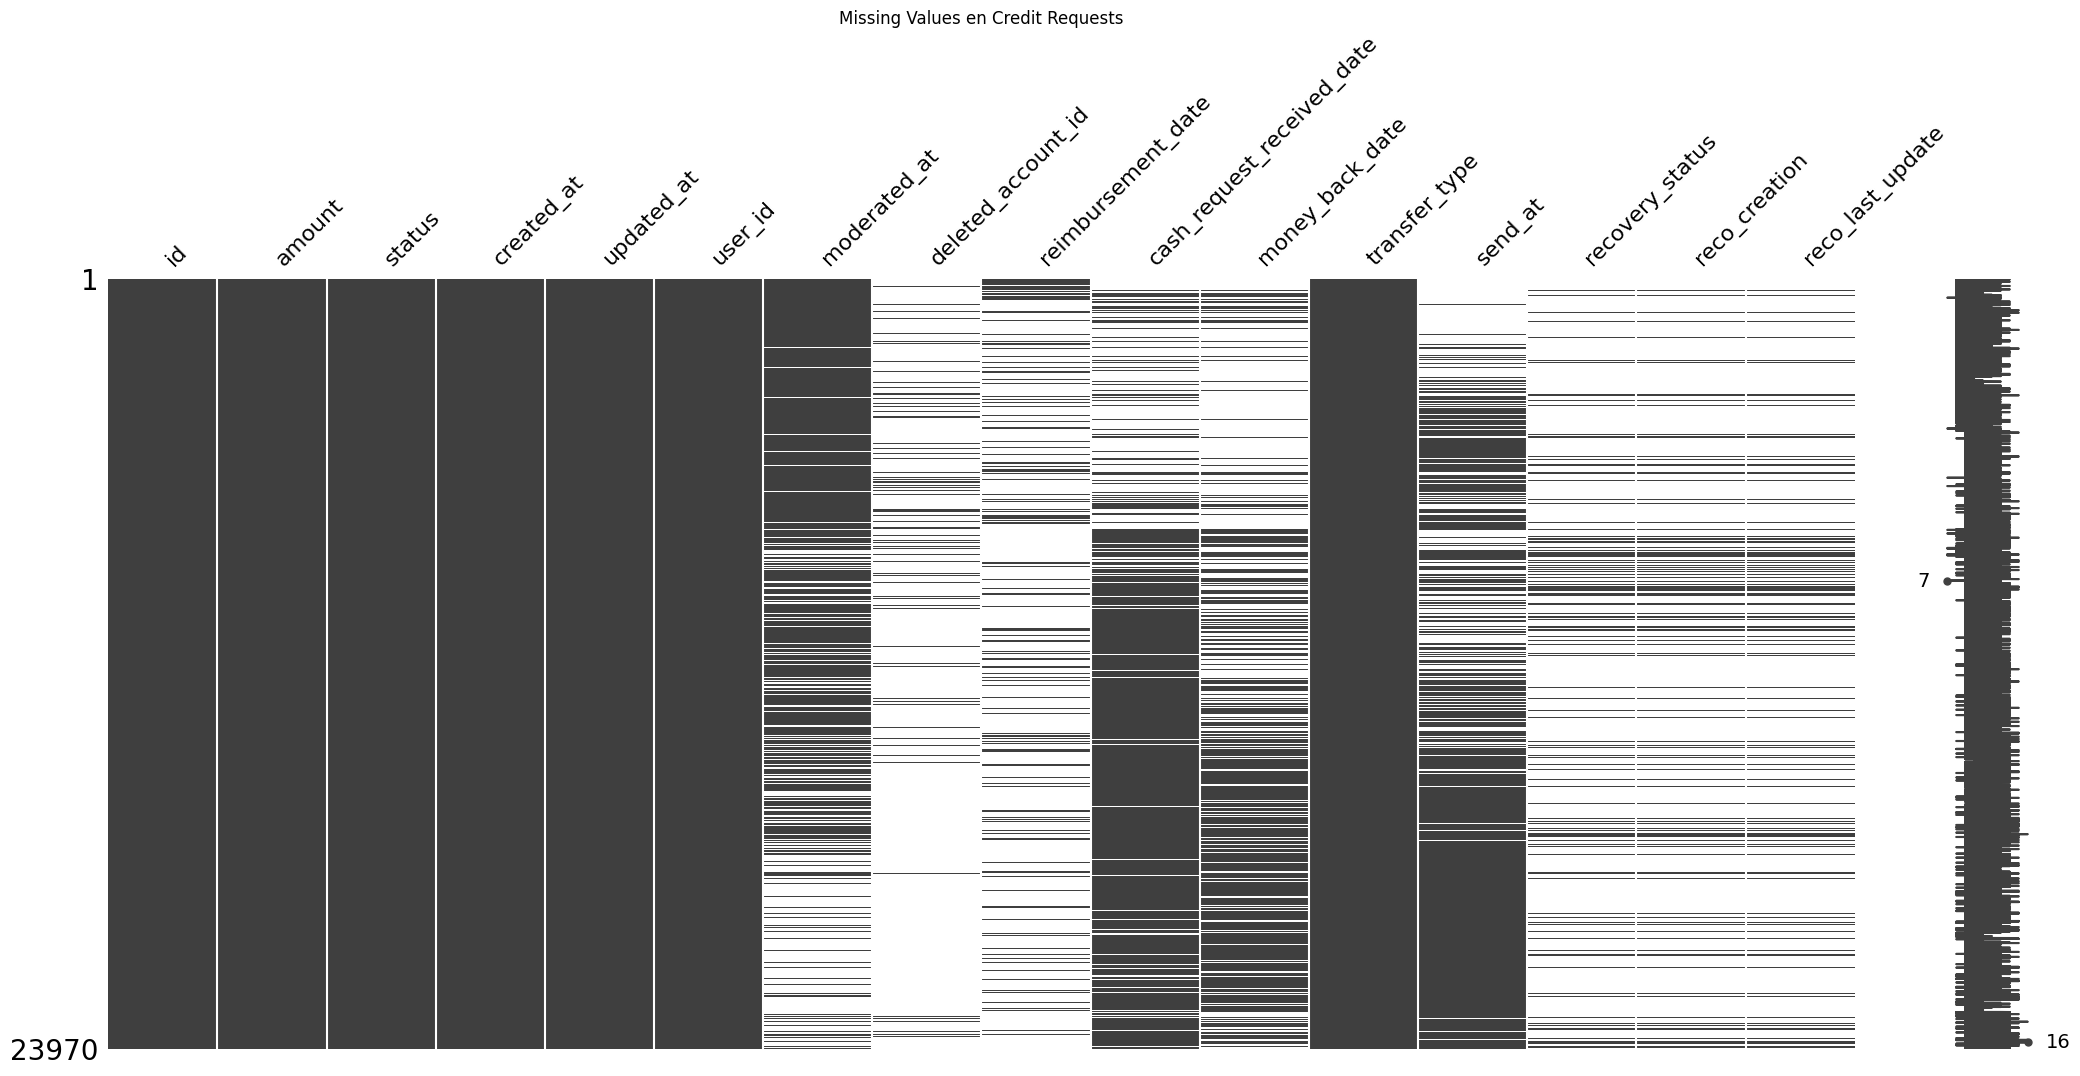

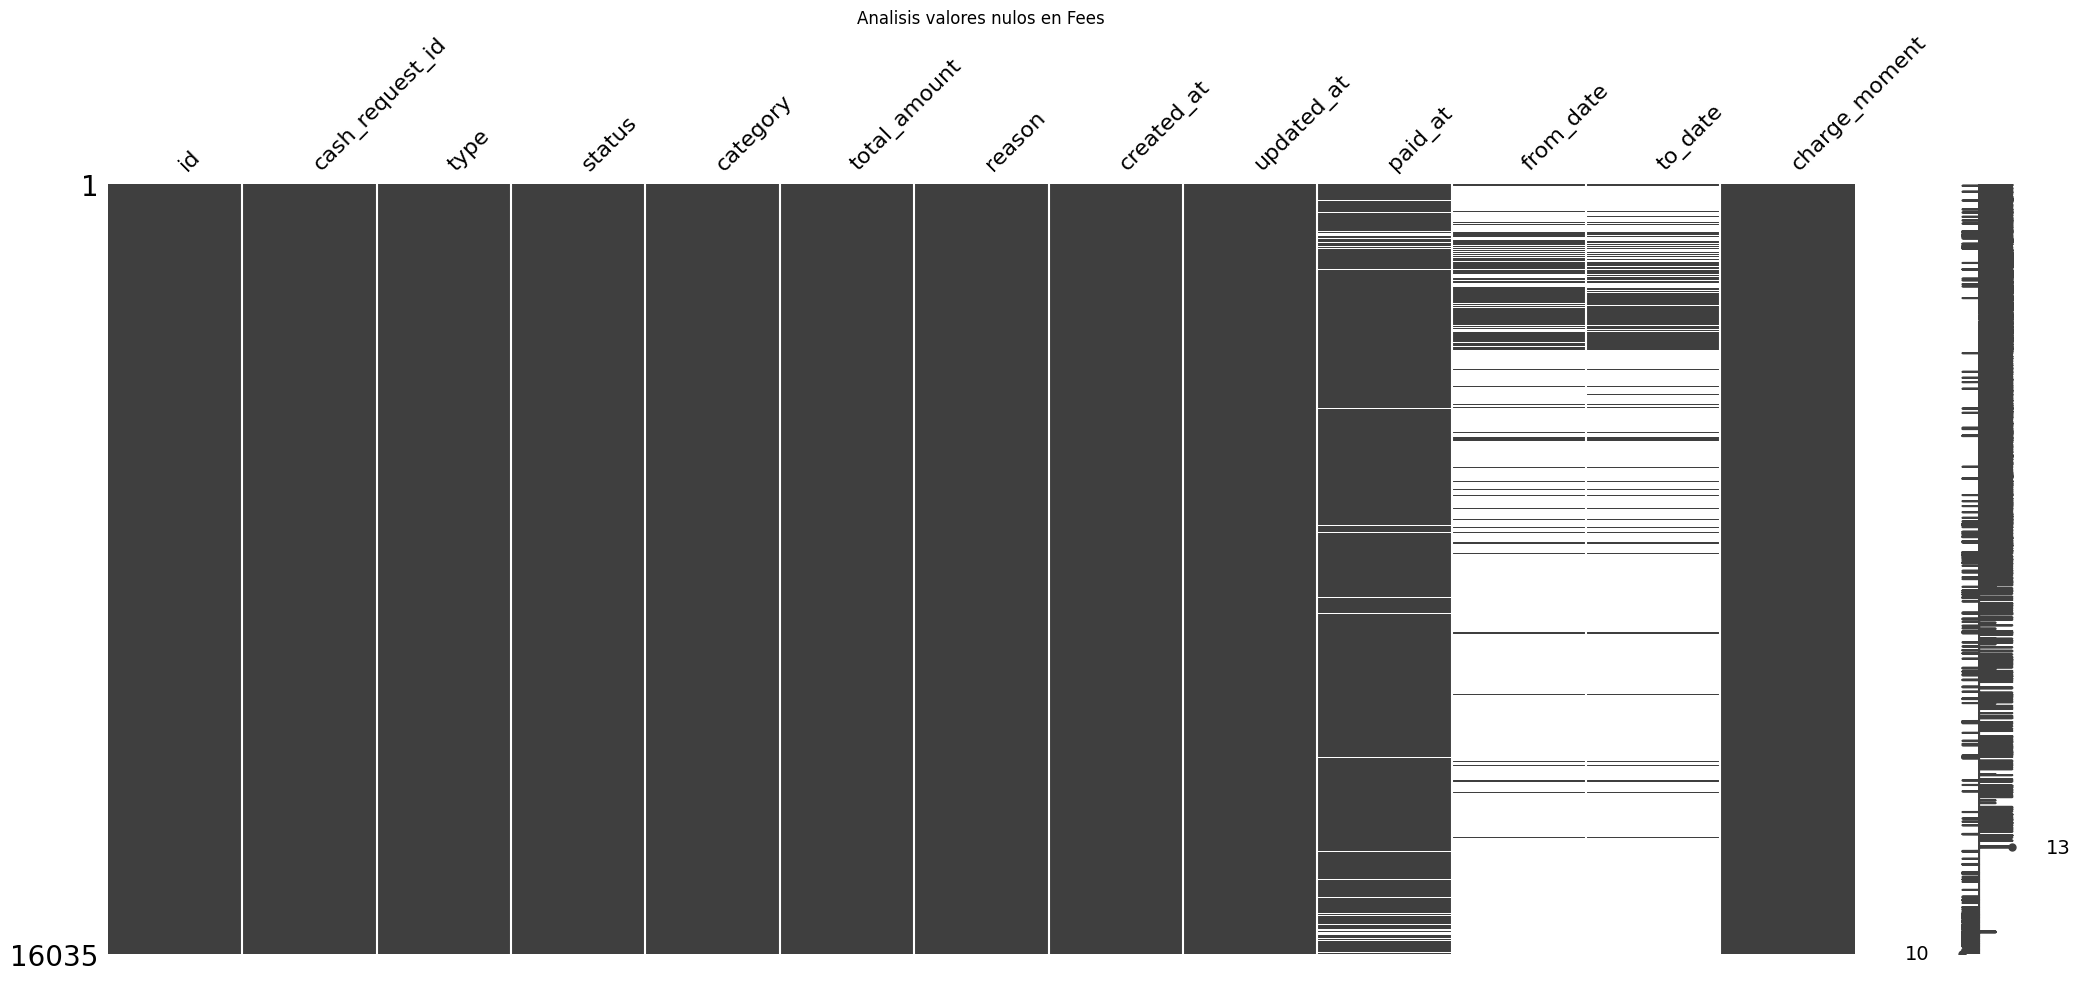

In [16]:
# Visualize missing values
import missingno as msno
msno.matrix(credit_requests)
plt.title("Missing Values en Credit Requests")
plt.show()

msno.matrix(data_cleaned)
plt.title("Analisis valores nulos en Fees")
plt.show()


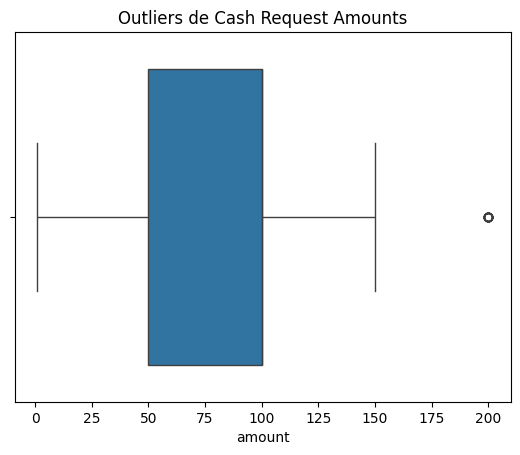

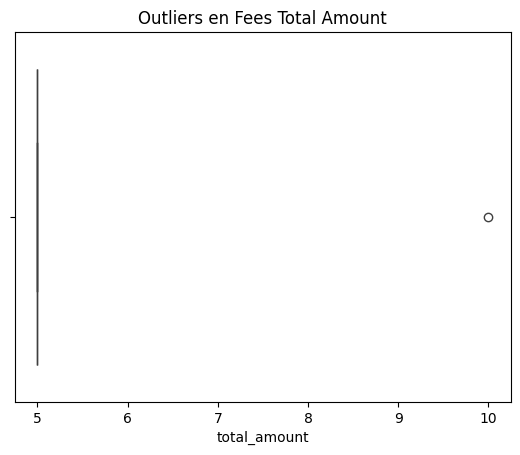

In [19]:
sns.boxplot(data=credit_requests, x='amount')
plt.title('Outliers de Cash Request Amounts')
plt.show()

sns.boxplot(data=data_cleaned, x='total_amount')
plt.title('Outliers en Fees Total Amount')
plt.show()


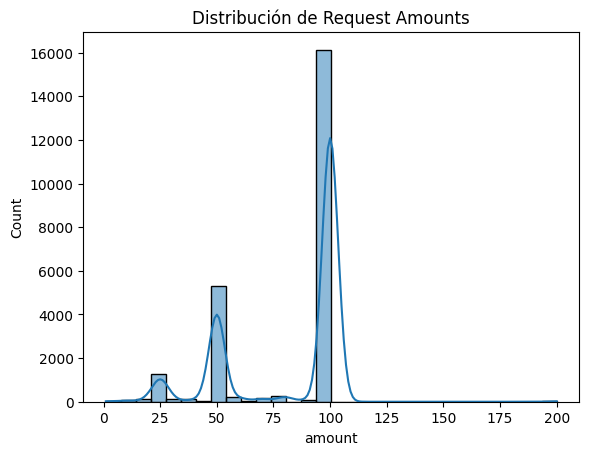

In [20]:
sns.histplot(credit_requests['amount'], bins=30, kde=True)
plt.title('Distribución de Request Amounts')
plt.show()


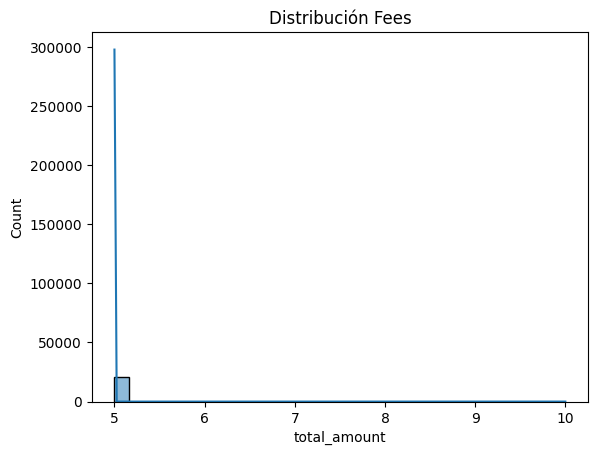

In [21]:
# Fee amount distribution
sns.histplot(fees['total_amount'], bins=30, kde=True)
plt.title('Distribución Fees')
plt.show()


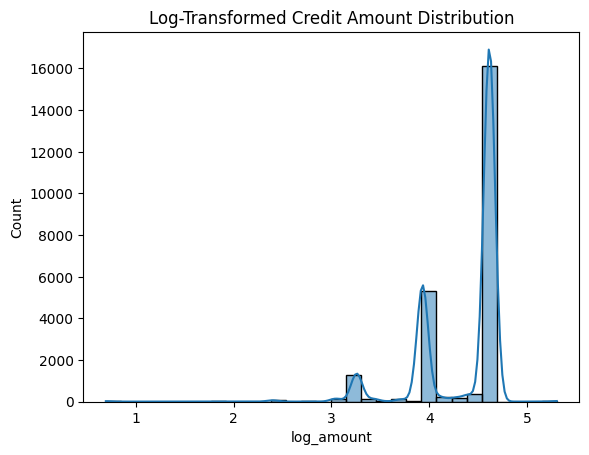

In [15]:
# Log trnsformation
credit_requests['log_amount'] = np.log1p(credit_requests['amount'])
sns.histplot(credit_requests['log_amount'], bins=30, kde=True)
plt.title('Log-Transformed Credit Amount Distribution')
plt.show()
